# Activation Functions in PyTorch

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_activation(func, name, x_range=(-5, 5)):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = func(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.numpy())
    plt.title(f"{name} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.show()

## 1. ReLU (Rectified Linear Unit)

**Equation:**

$$
f(x) = \max(0, x)
$$

**Description:**

ReLU is one of the most commonly used activation functions in deep learning, particularly in convolutional neural networks (CNNs). The function is simple yet effective: it returns the input value if it is positive, and zero otherwise. This piecewise linear function introduces non-linearity into the model, which is crucial for learning complex patterns in data.

**Why is ReLU used?**

1. **Non-Linearity:** ReLU introduces non-linearity, allowing neural networks to learn more complex patterns. Without non-linearity, a neural network would essentially be a linear regression model, unable to capture intricate relationships in the data.

2. **Mitigating the Vanishing Gradient Problem:** One of the main advantages of ReLU over older activation functions like sigmoid or tanh is its ability to mitigate the vanishing gradient problem. In deep networks, gradients often become very small as they propagate backward through layers, slowing down the learning process. ReLU's gradient is either 0 or 1, which helps in maintaining stronger gradients during backpropagation, thus speeding up training.

3. **Sparse Activation:** ReLU encourages sparse activation, meaning that in a large neural network, a significant number of neurons will output zero. This sparsity makes the model more efficient and easier to compute since fewer neurons are activated at any given time.

4. **Computational Efficiency:** The simplicity of ReLU means it is computationally efficient. ReLU operations are faster to compute than other activation functions like sigmoid or tanh, which involve expensive exponential calculations.

**Where is ReLU used?**

- **Computer Vision:** ReLU is the default activation function in convolutional neural networks (CNNs), which are widely used for image and video processing tasks. Its ability to introduce non-linearity without affecting the receptive field size of convolutional layers makes it ideal for vision tasks.

- **Deep Learning Models:** ReLU is extensively used in deep feedforward neural networks, where its ability to speed up training and avoid the vanishing gradient problem is critical for the performance of deep models.

- **Natural Language Processing (NLP):** In some NLP models, particularly in the feedforward layers of transformers and deep RNNs, ReLU is used to introduce non-linearity.

**PyTorch syntax:** `F.relu(x)` or `torch.nn.ReLU()`

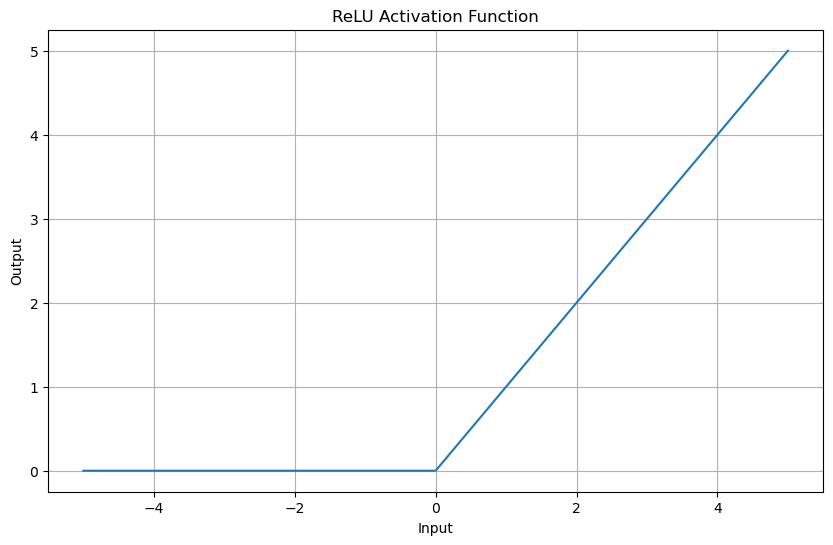

In [10]:
plot_activation(F.relu, "ReLU")

## 2. Sigmoid

**Equation:**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Description:**

The Sigmoid function is a classic activation function that squashes its input into a range between 0 and 1. This makes it particularly useful when the output needs to be interpreted as a probability. The function is S-shaped (or sigmoid) and provides smooth gradients, which are helpful for gradient-based optimization methods.

**Why is Sigmoid used?**

1. **Probability Interpretation:** Sigmoid is commonly used when the model's output needs to represent probabilities, particularly in binary classification tasks where the output can be interpreted as the probability of a class.

2. **Gradient Flow:** The Sigmoid function provides a smooth gradient, which is beneficial during backpropagation. This helps the model learn more effectively, especially in networks with fewer layers.

3. **Historical Significance:** While less commonly used in hidden layers today, Sigmoid was historically popular in early neural networks. It played a crucial role in the development of deep learning and is still relevant in certain contexts.

**Where is Sigmoid used?**

- **Binary Classification:** In binary classification tasks, Sigmoid is often used in the output layer to produce a probability that the input belongs to a particular class (e.g., logistic regression).

- **Gates in RNNs:** In Recurrent Neural Networks (RNNs), particularly in architectures like LSTMs and GRUs, the Sigmoid function is used in various gating mechanisms. These gates control the flow of information through the network.

- **Probabilistic Outputs:** Whenever the model needs to output probabilities (e.g., in the context of probabilistic interpretation of the model’s outputs), Sigmoid is an appropriate choice.

- **Embedded Systems:** In systems with limited computational resources, Sigmoid might still be preferred due to its simplicity and effectiveness in specific scenarios.

**PyTorch syntax:** `torch.sigmoid(x)` or `torch.nn.Sigmoid()`

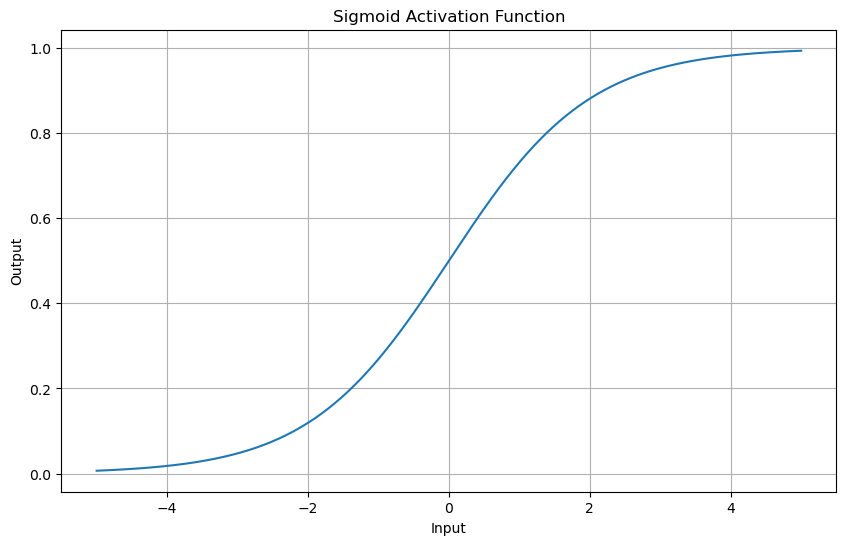

In [11]:
plot_activation(torch.sigmoid, "Sigmoid")

## 3. Tanh (Hyperbolic Tangent)

**Equation:**

$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**Description:**

The Tanh function, or hyperbolic tangent, is another S-shaped activation function similar to Sigmoid but with a range of -1 to 1. It is zero-centered, meaning the output is symmetric around the origin, which can make optimization easier in certain types of networks.

**Why is Tanh used?**

1. **Zero-Centered Output:** Unlike Sigmoid, which outputs values between 0 and 1, Tanh outputs values between -1 and 1. This zero-centered nature helps in centering the data, which can lead to faster convergence during training.

2. **Gradient Strength:** Tanh typically provides stronger gradients than Sigmoid, especially in the range where inputs are close to zero. This helps in mitigating the vanishing gradient problem better than Sigmoid in some cases.

3. **Improved Performance in Hidden Layers:** Tanh is often preferred over Sigmoid in hidden layers because it tends to perform better in deep networks, particularly for tasks where the data naturally centers around zero.

**Where is Tanh used?**

- **Recurrent Neural Networks (RNNs):** Tanh is widely used in RNNs, particularly in the hidden layers, where its zero-centered output is advantageous for processing sequences of data.

- **Hidden Layers:** In general feedforward neural networks, Tanh can be used in hidden layers where the network benefits from zero-centered, symmetric outputs.

- **Normalization:** Tanh is sometimes used when the inputs to a neural network are normalized or zero-centered, as it maps inputs into a similar range.

- **Image Processing:** In tasks where pixel values need to be normalized, Tanh can be used in the processing pipeline to maintain a consistent range of activations.

**PyTorch syntax:** `torch.tanh(x)` or `torch.nn.Tanh()`

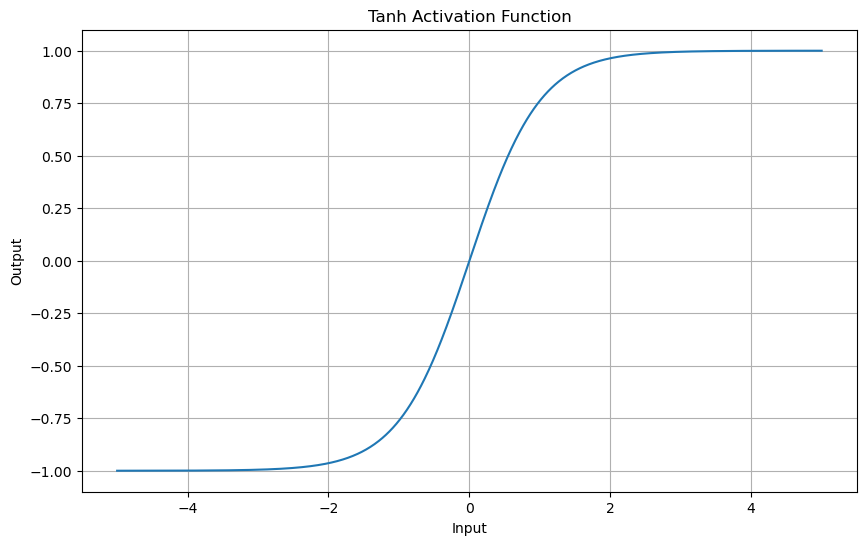

In [12]:
plot_activation(torch.tanh, "Tanh")

## 4. LeakyReLU

**Equation:**

$$
f(x) = \max(\alpha x, x), \text{ where } \alpha \text{ is a small constant (e.g., 0.01)}
$$

**Description:**

LeakyReLU is a variation of the ReLU activation function that allows a small, non-zero gradient when the input is negative. Instead of mapping all negative inputs to zero (as in standard ReLU), LeakyReLU multiplies them by a small constant factor (usually 0.01), ensuring that neurons do not "die" during training.

**Why is LeakyReLU used?**

1. **Avoiding the Dying ReLU Problem:** One issue with standard ReLU is that neurons can sometimes get stuck, outputting zero for all inputs. This is known as the "dying ReLU" problem. LeakyReLU addresses this by allowing a small gradient for negative inputs, which helps keep neurons active.

2. **Improved Gradient Flow:** By maintaining a small, non-zero gradient for negative inputs, LeakyReLU helps preserve the gradient flow during backpropagation, which can lead to better training performance, particularly in deep networks.

3. **Flexible Activation:** The parameter α (usually set to 0.01) can be adjusted, making LeakyReLU a flexible choice for different tasks. This flexibility allows for better control over the activation dynamics within the network.

**Where is LeakyReLU used?**

- **Deep Neural Networks:** LeakyReLU is often used in deep neural networks where the risk of neurons "dying" is higher due to the depth of the model. It is a preferred choice in scenarios where standard ReLU might cause issues with gradient flow.

- **Generative Adversarial Networks (GANs):** LeakyReLU is commonly used in GANs, particularly in the discriminator network, where it helps avoid saturation and ensures better gradient flow.

- **Computer Vision:** In certain computer vision tasks, where feature extraction needs to be robust, LeakyReLU provides a more stable activation function, especially in deeper layers.

- **Reinforcement Learning:** In reinforcement learning, LeakyReLU can be useful in networks where exploration of negative value spaces is necessary, helping to maintain diverse action policies.

**PyTorch syntax:** `F.leaky_relu(x)` or `torch.nn.LeakyReLU()`

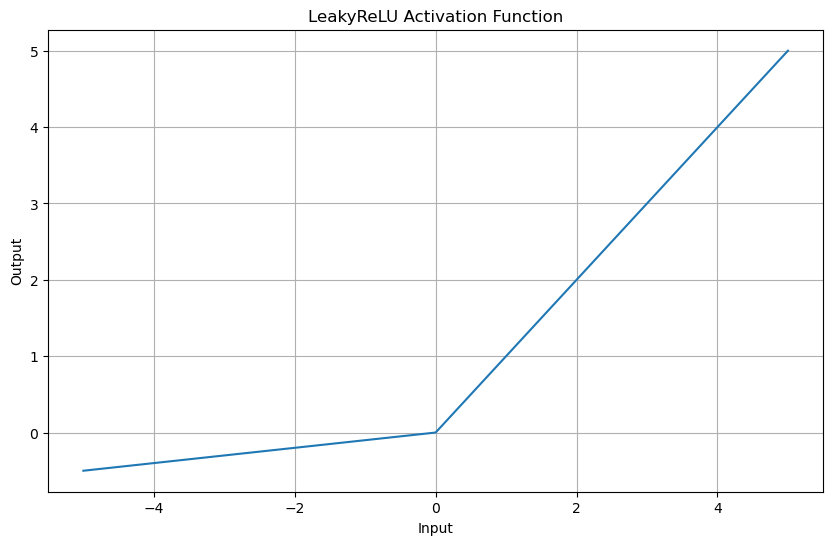

In [13]:
plot_activation(lambda x: F.leaky_relu(x, negative_slope=0.1), "LeakyReLU")

## 5. ELU (Exponential Linear Unit)

**Equation:**

$$
f(x) = x \text{ if } x > 0 \text{ else } \alpha(e^x - 1)
$$

**Description:**

ELU is an activation function that behaves like ReLU for positive inputs but smooths the negative part of the function, allowing it to produce small negative outputs. This can help the model learn faster and achieve better generalization by pushing the mean activation closer to zero.

**Why is ELU used?**

1. **Smooth Non-Linearity:** Unlike ReLU, which has a sharp change at zero, ELU smooths out this transition, which can lead to better learning dynamics by reducing the bias shift in the activations.

2. **Negative Outputs:** ELU allows for negative outputs, which can help balance the activations in the network. This can lead to better convergence and more stable training, particularly in networks where maintaining zero-centered data is important.

3. **Improved Learning:** By allowing the network to output negative values, ELU can help speed up learning, especially when compared to ReLU, by reducing the bias shift and enabling the network to converge faster.

**Where is ELU used?**

- **Deep Neural Networks:** ELU is often used in deep networks where the smoother activation function can lead to faster convergence and better performance, particularly in tasks that require high precision.

- **Image Classification:** In image classification tasks, where the model needs to be highly accurate, ELU can provide a more stable learning process compared to ReLU or LeakyReLU.

- **Normalization:** ELU’s ability to push activations closer to zero can reduce the need for batch normalization in certain networks, simplifying the architecture.

- **Time-Series Prediction:** In time-series forecasting, where smooth transitions in activation are necessary, ELU can provide better results by reducing the harshness of the activation changes, particularly for negative inputs.

**PyTorch syntax:** `F.elu(x)` or `torch.nn.ELU()`

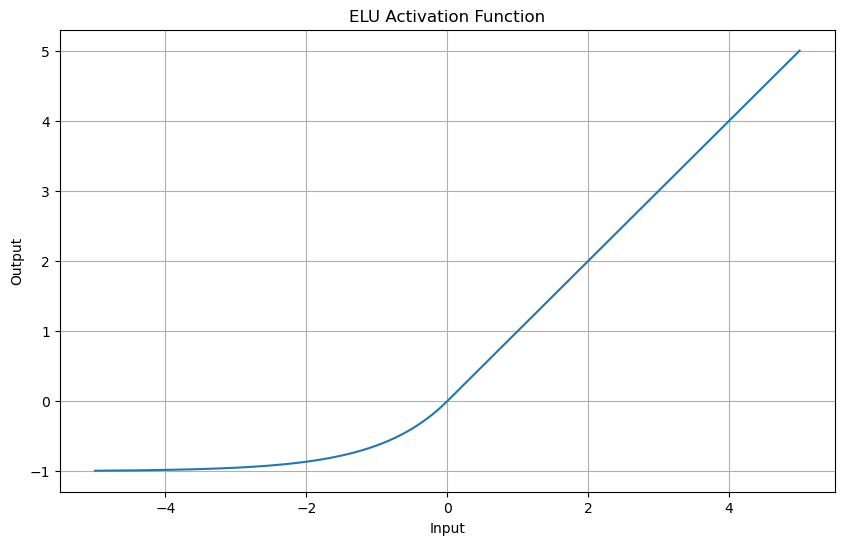

In [14]:
plot_activation(F.elu, "ELU")

## 6. SELU (Scaled Exponential Linear Unit)

**Equation:**

$$
f(x) = \lambda \cdot (x \text{ if } x > 0 \text{ else } \alpha(e^x - 1)), \text{ where } \lambda \text{ and } \alpha \text{ are predefined constants}
$$

**Description:**

SELU is an activation function designed to induce self-normalizing properties in neural networks. By scaling and shifting the outputs, SELU ensures that the activations remain within a certain range, reducing the need for explicit normalization techniques like batch normalization.

**Why is SELU used?**

1. **Self-Normalizing Networks:** SELU is designed to keep the mean and variance of the activations stable, which leads to "self-normalizing" neural networks. This reduces the need for additional normalization layers and helps the network maintain consistent behavior as it deepens.

2. **Reduced Vanishing/Exploding Gradients:** SELU helps mitigate the vanishing and exploding gradient problems by maintaining a consistent distribution of activations, particularly in deep networks. This makes it easier to train very deep models.

3. **Automatic Normalization:** The built-in normalization effect of SELU allows the network to adaptively maintain a normalized distribution of activations without requiring explicit normalization techniques like batch normalization.

**Where is SELU used?**

- **Deep Neural Networks:** SELU is particularly beneficial in very deep networks, where maintaining a consistent activation distribution is critical for effective training. Its self-normalizing properties make it ideal for such scenarios.

- **Feedforward Networks:** In feedforward networks, SELU can replace batch normalization layers, simplifying the architecture while maintaining effective training dynamics.

- **Reinforcement Learning:** In reinforcement learning, where deep policies often suffer from unstable training, SELU can provide more stable learning by maintaining normalized activations throughout the network.

- **Automatic Speech Recognition (ASR):** SELU is sometimes used in ASR models, where the consistency of activation distributions can lead to better performance in recognizing patterns in speech data.

**PyTorch syntax:** `F.selu(x)` or `torch.nn.SELU()`

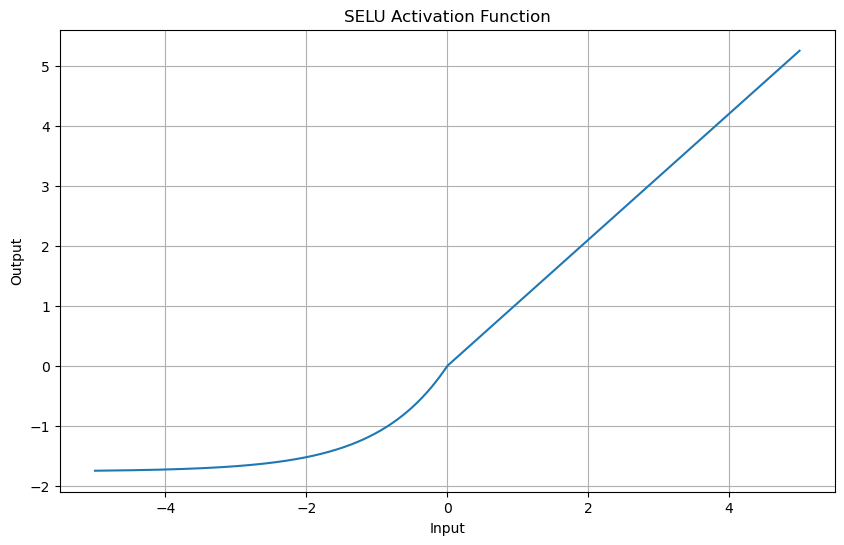

In [15]:
plot_activation(F.selu, "SELU")

## 7. Softmax

**Equation:**

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}} \text{ for } j = 1, \ldots, K
$$

**Description:**

Softmax is a function that converts a vector of raw scores (logits) into probabilities, with each probability representing the relative likelihood of each class. The sum of these probabilities is 1, making Softmax particularly useful for multi-class classification problems.

**Why is Softmax used?**

1. **Probability Distribution:** Softmax converts raw logits into a probability distribution, which is essential when the model's output needs to be interpreted as probabilities. This makes it ideal for the final layer of a classifier where each output class's probability is needed.

2. **Multi-Class Classification:** Unlike binary classification, where a single sigmoid function suffices, multi-class classification requires a different approach. Softmax ensures that the model's outputs across different classes sum to 1, providing a normalized probability distribution over all possible classes.

3. **Differentiable Function:** Softmax is differentiable, which is crucial for backpropagation. During training, the model uses the gradient of the loss with respect to the outputs, and Softmax allows for this gradient to be computed effectively, enabling the network to learn.

4. **Handling Imbalanced Outputs:** Softmax can effectively handle imbalanced outputs by emphasizing the most likely class while still providing a probabilistic interpretation for less likely classes. This feature is useful in scenarios where some classes may dominate, and the model needs to provide calibrated probabilities.

**Where is Softmax used?**

- **Multi-Class Classification:** Softmax is the standard activation function in the output layer of neural networks used for multi-class classification tasks. Examples include models that classify images into categories, such as identifying objects in images (e.g., cats, dogs, cars) or predicting the sentiment of a text (e.g., positive, neutral, negative).

- **Neural Language Models:** In Natural Language Processing (NLP), Softmax is used in models like RNNs, LSTMs, GRUs, and Transformers for tasks such as language modeling, machine translation, and text classification. In these contexts, Softmax helps in predicting the probability distribution over the vocabulary.

- **Attention Mechanisms:** Softmax is used in attention mechanisms within neural networks, where it is applied to calculate the attention weights. These weights determine how much focus the model should give to different parts of the input, which is crucial in tasks like machine translation and image captioning.

- **Reinforcement Learning:** In policy networks used in reinforcement learning, Softmax is used to convert raw scores for different actions into a probability distribution, which is then used to select actions based on the learned policy.

**PyTorch syntax:** `F.softmax(x, dim=0)` or `torch.nn.Softmax(dim=0)`

In [16]:
x = torch.randn(5)
softmax = F.softmax(x, dim=0)
print(f"Input: {x}")
print(f"Softmax output: {softmax}")
print(f"Sum of probabilities: {softmax.sum()}")  # Should be close to 1

Input: tensor([ 0.8440,  0.6125,  0.8308, -1.8279,  0.4442])
Softmax output: tensor([0.2841, 0.2254, 0.2804, 0.0196, 0.1905])
Sum of probabilities: 1.0
